# Principal Component Analysis
Dimentionality Reduction Technique used to reduce the features. Generates the new features with new values (i.e components), then train the model to predict the target.

* Accuracy might drop due to reduction of freatures. may cause dimentionality curse.
* Scale Features Before Applying PCA for better understanding the components.
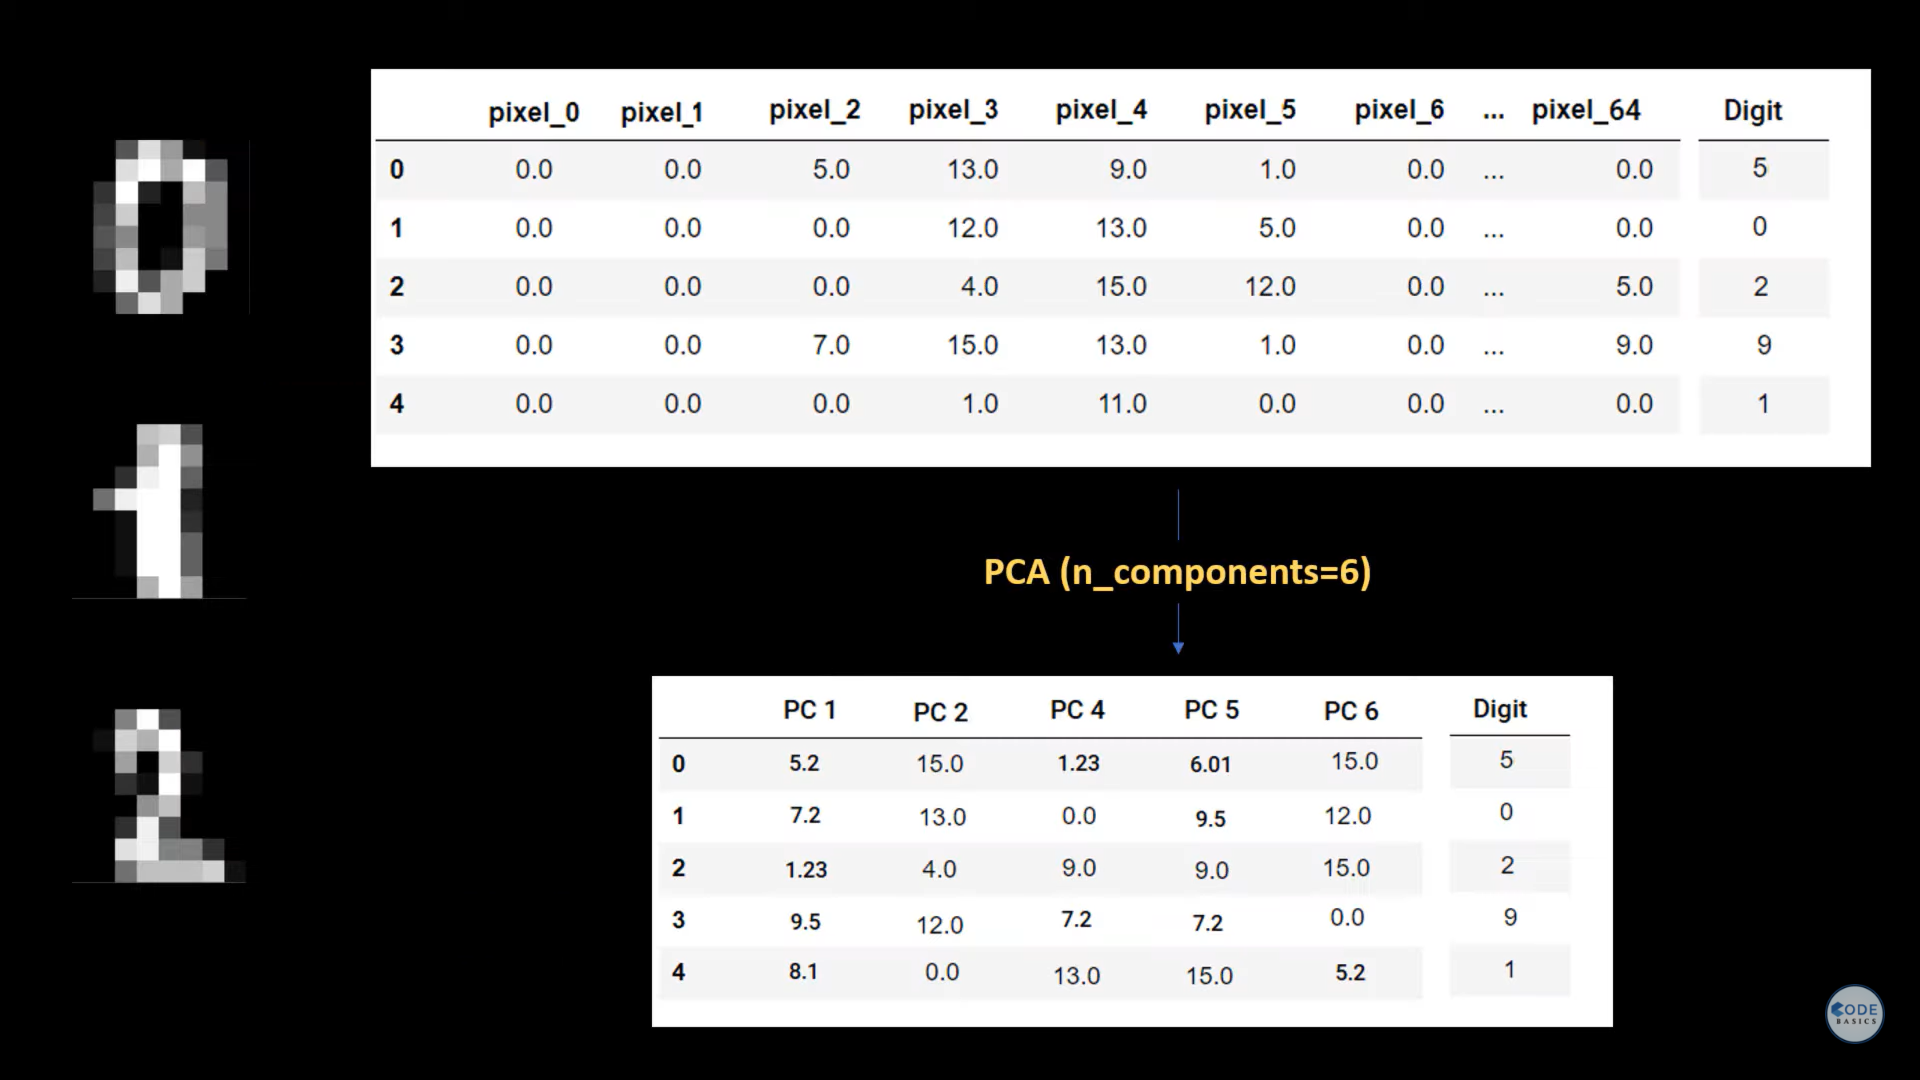
<!-- <img src="[image.png](attachment:image.png)" alt="image" width="300"/> -->


In [2]:
import pandas as pd
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
import matplotlib.pyplot as plt

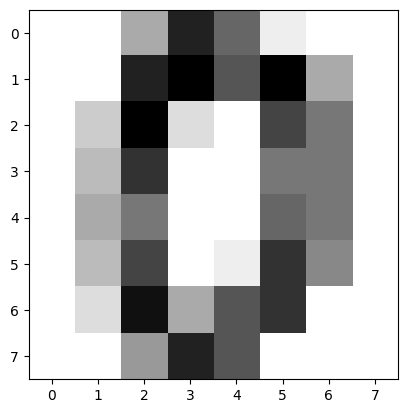

In [10]:
plt.imshow(digits.images[0],cmap=plt.cm.gray_r,)

In [11]:
digits.data.shape

(1797, 64)

the digits.data(every image) contains the 64 features(pixels) ranging from 0->16.

<Figure size 640x480 with 0 Axes>

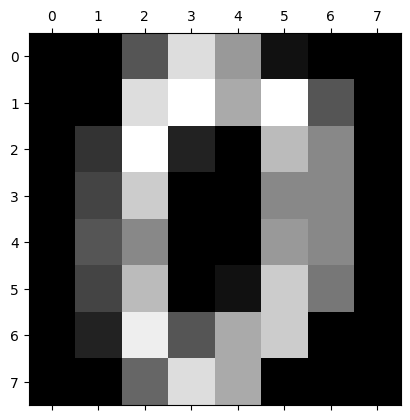

In [13]:
plt.gray()
plt.matshow(digits.data[0].reshape(8,8))  #converted 64pixel array to 8*8 2d array and ploting.

In [ ]:
import numpy as np
 
np.unique(digits.target)   #these are the target values that present in target feature.

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
# converting the digits data to data frame

df = pd.DataFrame(digits.data,columns=digits.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [18]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [ ]:
x = df
y = digits.target

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [25]:
type(x_scaled)

numpy.ndarray

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2)

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [30]:
model.score(x_train,y_train)

0.6024612132810174

In [31]:
y_pred = model.predict(x_test)

In [34]:
import pandas as pd

pd.DataFrame({'acural':y_test,'predicted':y_pred})

,acural,predicted
0,5,6.370730
1,4,3.228700
2,5,6.130810
3,6,5.271942
4,8,4.972430
...,...,...
355,8,3.999224
356,1,2.804129
357,7,6.384091
358,2,2.074521


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)  #give 95% useful new features or explicitly say no.of comp --> n_components = 20
x_pca = pca.fit_transform(x)

In [37]:
x_pca.shape

(1797, 29)

In [43]:
pca.explained_variance_

array([179.0069301 , 163.71774688, 141.78843909, 101.1003752 ,
        69.51316559,  59.10852489,  51.88453911,  44.01510667,
        40.31099529,  37.0117984 ,  28.51904118,  27.32116981,
        21.90148814,  21.32435654,  17.63672222,  16.94686385,
        15.85138991,  15.00446022,  12.23447318,  10.88685932,
        10.69356625,   9.58259779,   9.2264026 ,   8.69036872,
         8.3656119 ,   7.16577961,   6.91973881,   6.19295508,
         5.88499123])

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2)

In [45]:
model.fit(x_train,y_train)

LinearRegression()

In [46]:
model.score(x_train,y_train)

0.5668361395131003

In [47]:
y_pred = model.predict(x_test)

In [48]:
import pandas as pd

pd.DataFrame({'acural':y_test,'predicted':y_pred})

,acural,predicted
0,7,4.295616
1,1,3.424281
2,4,4.562819
3,5,6.125446
4,4,6.807051
...,...,...
355,3,3.966870
356,5,6.387436
357,6,6.833315
358,8,5.158374
